<a href="https://colab.research.google.com/github/flammarionick/Summative-Linear-Regression-Model-Deployment-Using-Flutter/blob/main/Summative_Linear_Regression_Model_Deployment_Using_Flutter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files

# Upload file manually
uploaded = files.upload()


Saving AirQuality.csv to AirQuality.csv


In [3]:
import pandas as pd

# List the uploaded files
uploaded_file_path = list(uploaded.keys())[0]

# Load the dataset
df = pd.read_csv(uploaded_file_path, sep=';')

# Display the first few rows
df.head()



,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [4]:
# Check for missing values
df.isnull().sum()


,0
Date,114
Time,114
CO(GT),114
PT08.S1(CO),114
NMHC(GT),114
C6H6(GT),114
PT08.S2(NMHC),114
NOx(GT),114
PT08.S3(NOx),114
NO2(GT),114


In [5]:
# Get column names
df.columns


Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In [6]:
# Drop unnecessary columns
df = df.drop(columns=['Date', 'Time', 'Unnamed: 15', 'Unnamed: 16'])

# Check the new column structure
df.head()


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


In [7]:
# Check for missing values
df.isnull().sum()


,0
CO(GT),114
PT08.S1(CO),114
NMHC(GT),114
C6H6(GT),114
PT08.S2(NMHC),114
NOx(GT),114
PT08.S3(NOx),114
NO2(GT),114
PT08.S4(NO2),114
PT08.S5(O3),114


In [9]:
# Check column data types
df.dtypes

,0
CO(GT),object
PT08.S1(CO),float64
NMHC(GT),float64
C6H6(GT),object
PT08.S2(NMHC),float64
NOx(GT),float64
PT08.S3(NOx),float64
NO2(GT),float64
PT08.S4(NO2),float64
PT08.S5(O3),float64


In [10]:
# List of columns to convert
cols_to_convert = ['T', 'RH', 'AH', 'CO(GT)', 'C6H6(GT)']

# Convert to numeric, forcing errors to NaN
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Check data types again
df.dtypes

,0
CO(GT),float64
PT08.S1(CO),float64
NMHC(GT),float64
C6H6(GT),float64
PT08.S2(NMHC),float64
NOx(GT),float64
PT08.S3(NOx),float64
NO2(GT),float64
PT08.S4(NO2),float64
PT08.S5(O3),float64


In [11]:
# Fill missing values with column mean
df.fillna(df.mean(), inplace=True)

# Check if missing values are gone
df.isnull().sum()

,0
CO(GT),0
PT08.S1(CO),0
NMHC(GT),0
C6H6(GT),9471
PT08.S2(NMHC),0
NOx(GT),0
PT08.S3(NOx),0
NO2(GT),0
PT08.S4(NO2),0
PT08.S5(O3),0


In [20]:
df['C6H6(GT)'].dtype

dtype('float64')

In [21]:
df['C6H6(GT)'].value_counts(dropna=False)

,count
C6H6(GT),
NaN,9471


In [22]:
# Force fill the missing values with a constant
df['C6H6(GT)'].fillna(1.0, inplace=True)

# Check if it worked
df.isnull().sum()

<ipython-input-22-25419568a8d0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['C6H6(GT)'].fillna(1.0, inplace=True)


,0
CO(GT),0
PT08.S1(CO),0
NMHC(GT),0
C6H6(GT),0
PT08.S2(NMHC),0
NOx(GT),0
PT08.S3(NOx),0
NO2(GT),0
PT08.S4(NO2),0
PT08.S5(O3),0


In [23]:
# Confirm all columns are numeric
df.dtypes

,0
CO(GT),float64
PT08.S1(CO),float64
NMHC(GT),float64
C6H6(GT),float64
PT08.S2(NMHC),float64
NOx(GT),float64
PT08.S3(NOx),float64
NO2(GT),float64
PT08.S4(NO2),float64
PT08.S5(O3),float64


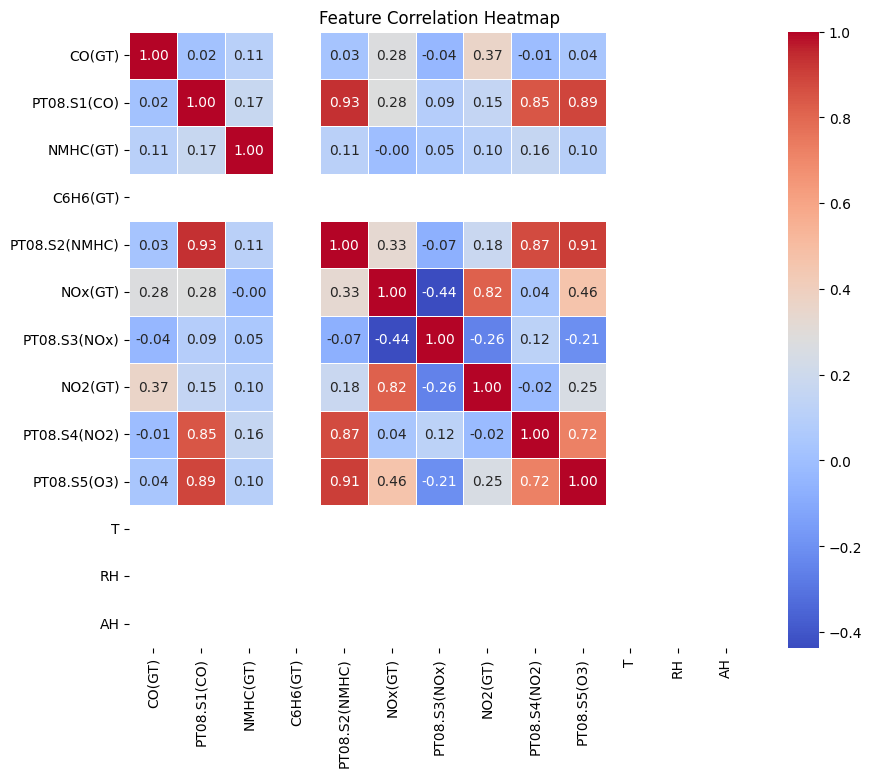

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [25]:
# Sort correlation values in descending order
corr_matrix["C6H6(GT)"].sort_values(ascending=False)

,C6H6(GT)
CO(GT),NaN
PT08.S1(CO),NaN
NMHC(GT),NaN
C6H6(GT),NaN
PT08.S2(NMHC),NaN
NOx(GT),NaN
PT08.S3(NOx),NaN
NO2(GT),NaN
PT08.S4(NO2),NaN
PT08.S5(O3),NaN


In [26]:
df['C6H6(GT)'].isnull().sum()

0

In [30]:
df['C6H6(GT)'].nunique()

1

In [31]:
# Use interpolation to estimate missing values
df['C6H6(GT)'] = df['C6H6(GT)'].interpolate()

# Check unique values again
df['C6H6(GT)'].nunique()

1

In [32]:
# Recalculate correlation with C6H6(GT)
df.corr()["C6H6(GT)"].sort_values(ascending=False)

,C6H6(GT)
CO(GT),NaN
PT08.S1(CO),NaN
NMHC(GT),NaN
C6H6(GT),NaN
PT08.S2(NMHC),NaN
NOx(GT),NaN
PT08.S3(NOx),NaN
NO2(GT),NaN
PT08.S4(NO2),NaN
PT08.S5(O3),NaN


In [33]:
# Drop C6H6(GT) because it has no variation
df = df.drop(columns=['C6H6(GT)'])

# Confirm it's gone
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,-148.423023,1360.0,150.0,1046.0,166.0,1056.0,113.0,1692.0,1268.0,-200.0,-200.0,-200.0
1,2.000000,1292.0,112.0,955.0,103.0,1174.0,92.0,1559.0,972.0,-200.0,-200.0,-200.0
2,-148.423023,1402.0,88.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,-200.0,-200.0,-200.0
3,-148.423023,1376.0,80.0,948.0,172.0,1092.0,122.0,1584.0,1203.0,-200.0,-200.0,-200.0
4,-148.423023,1272.0,51.0,836.0,131.0,1205.0,116.0,1490.0,1110.0,-200.0,-200.0,-200.0
